
# About Dataset
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASESTRX : Numbe of purchase transactions made
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

# Import das Libs de Manipulação e Visualização de Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Aquisição dos Dados

df = pd.read_csv('../data/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.drop('CUST_ID',axis=1, inplace=True)

In [4]:
print('Qnt linhas {}\nQnt Colunas: {}'.format(df.shape[0], df.shape[1]))

Qnt linhas 8950
Qnt Colunas: 17


In [5]:
# Avaliando Valores Null
df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

# EDA

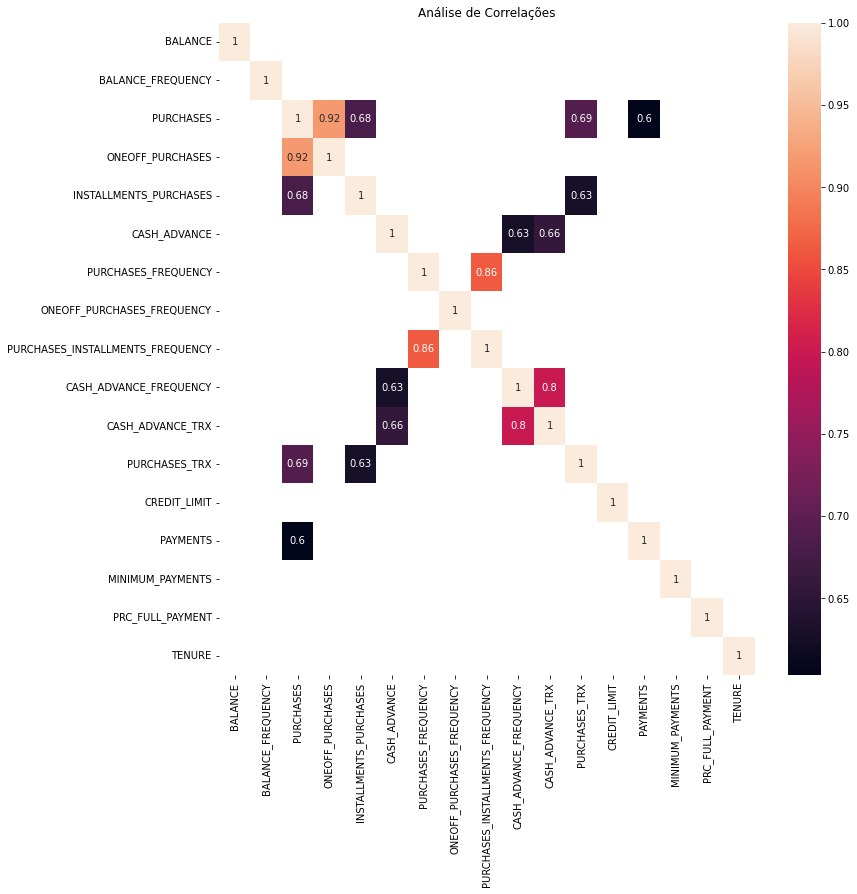

In [6]:
correlacoes = df.corr()
plt.figure(figsize=(12,12))
plt.title('Análise de Correlações')
sns.heatmap(correlacoes[abs(correlacoes) > 0.6], annot=True);

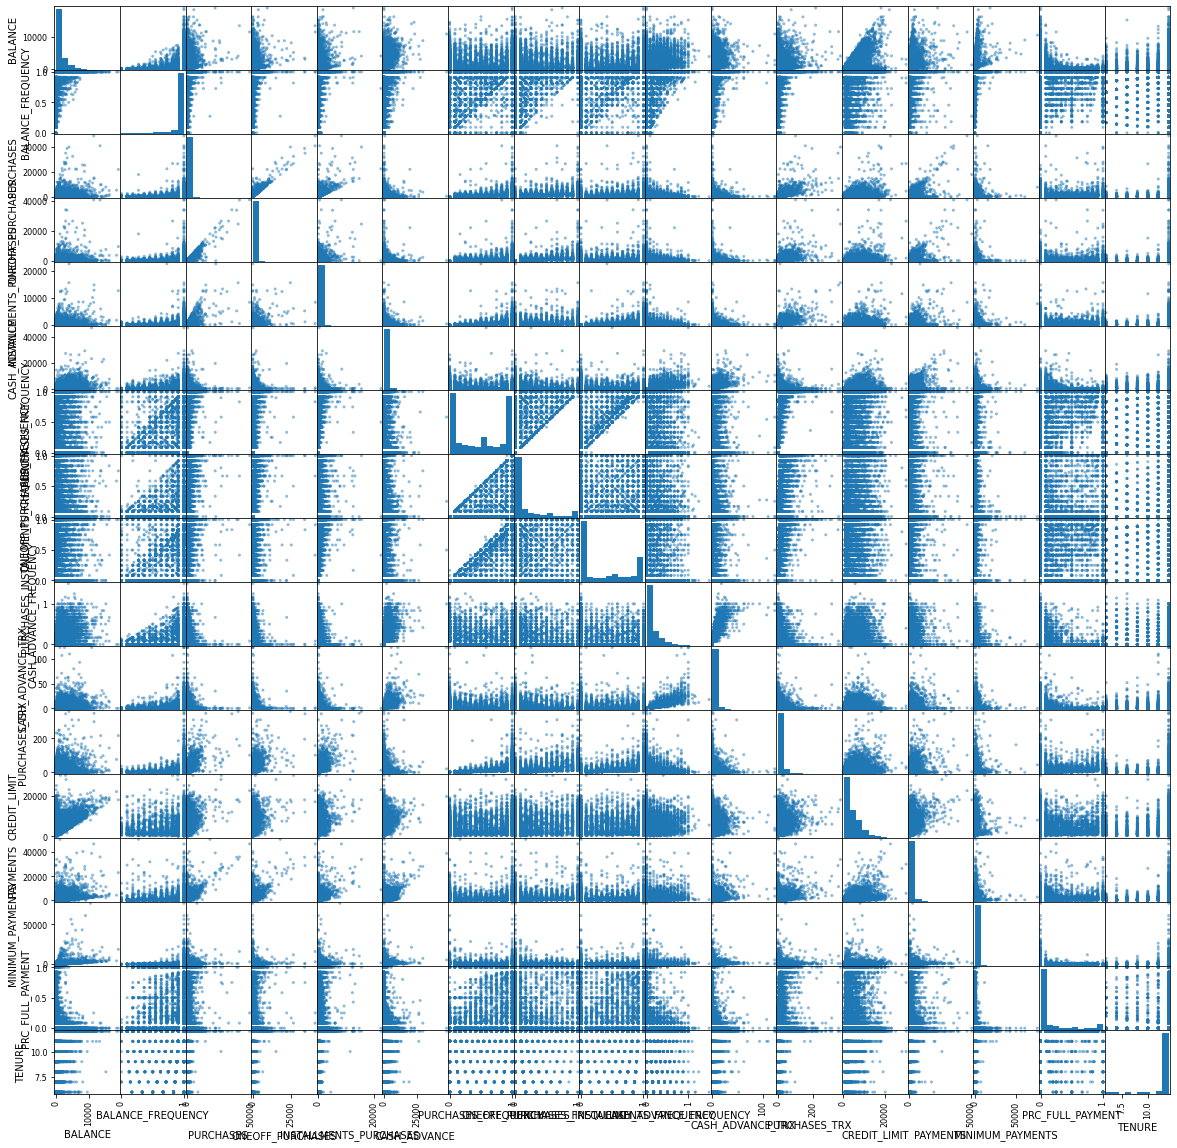

In [7]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20));

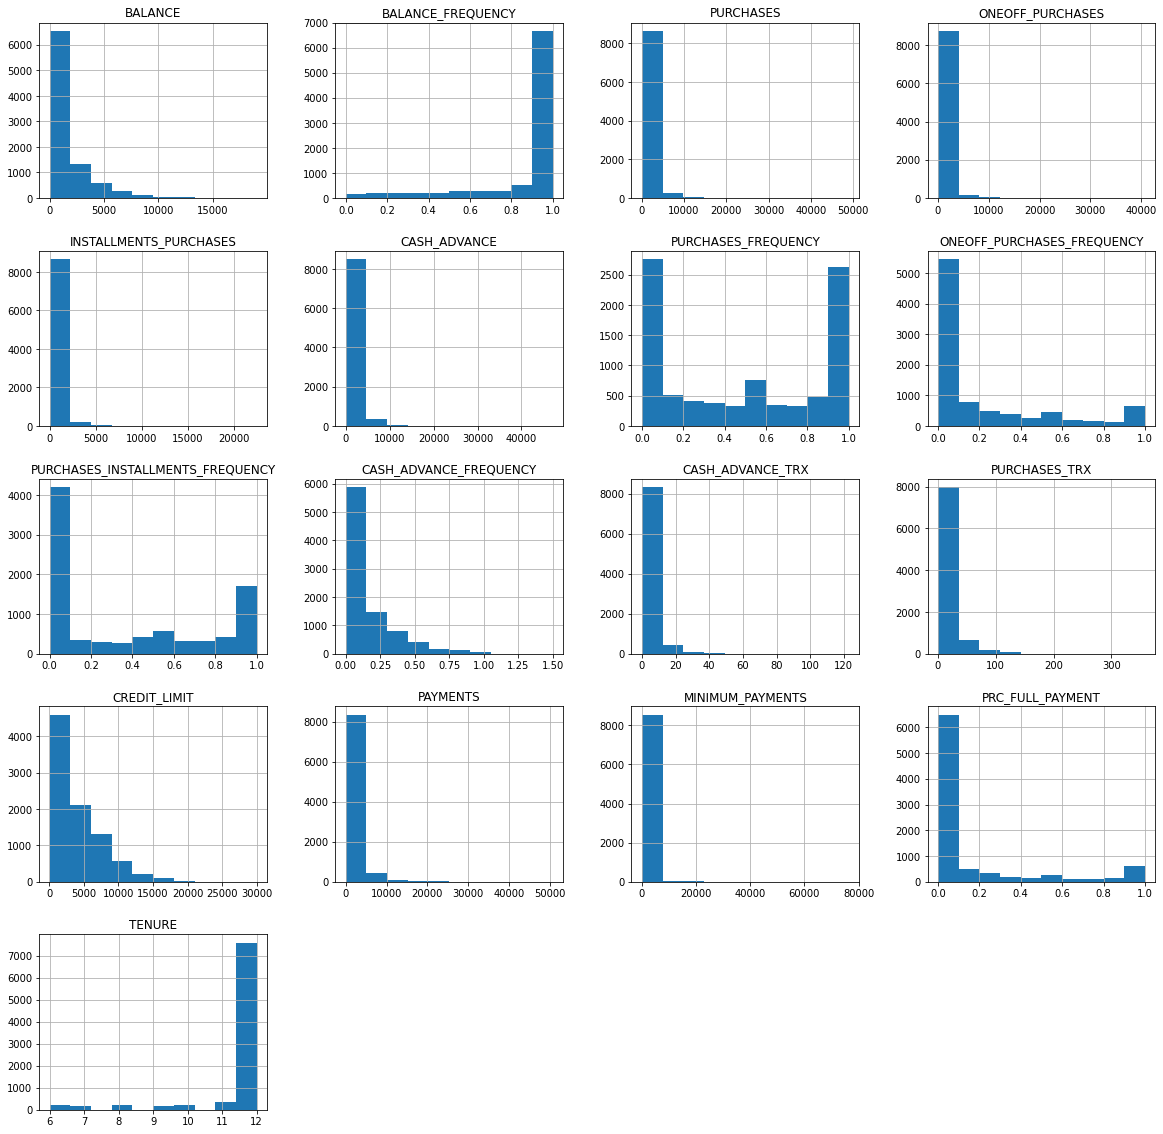

In [8]:
# Historamas
df.hist(figsize=(20,20));

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


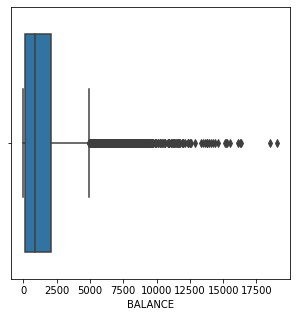

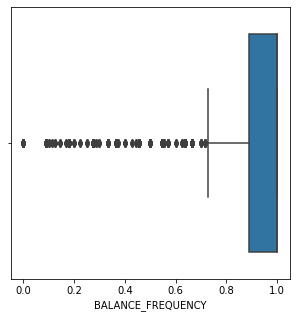

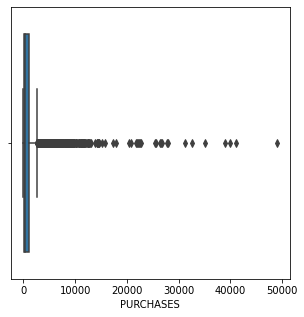

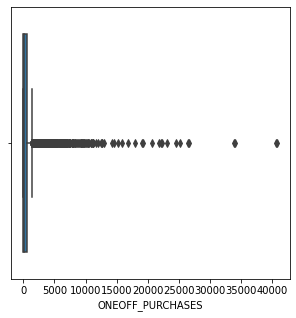

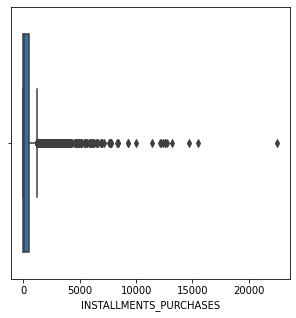

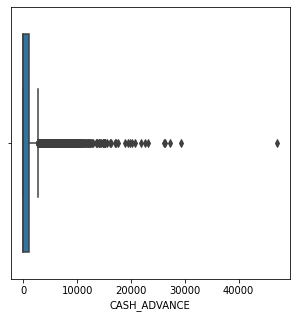

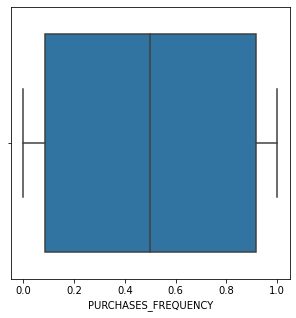

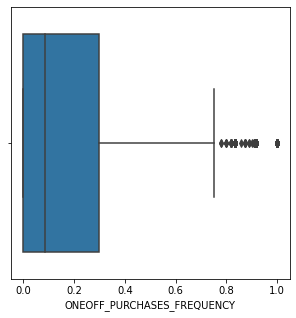

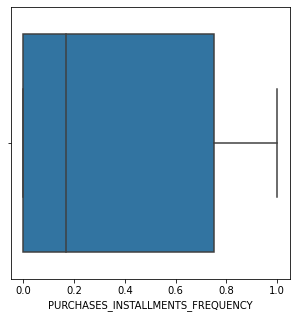

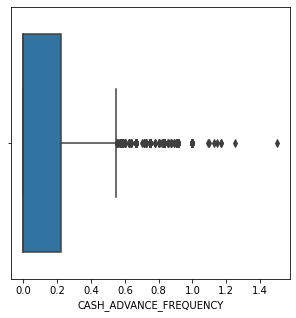

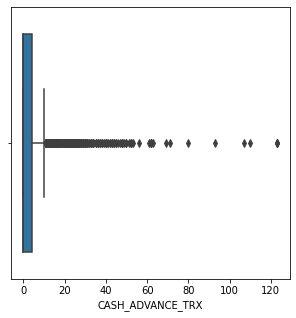

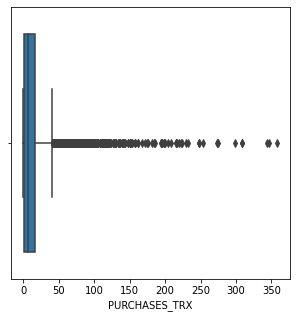

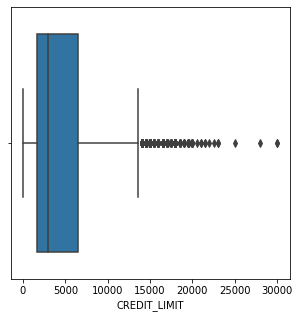

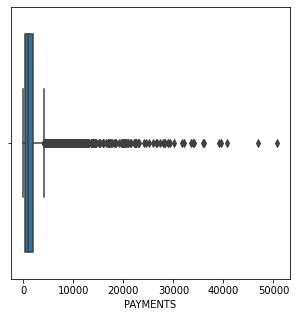

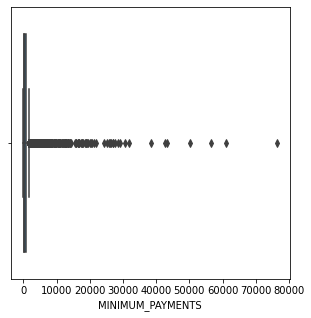

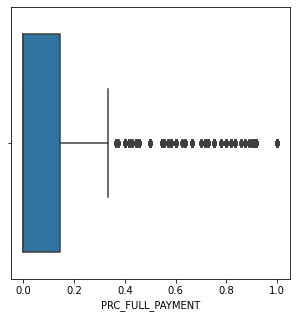

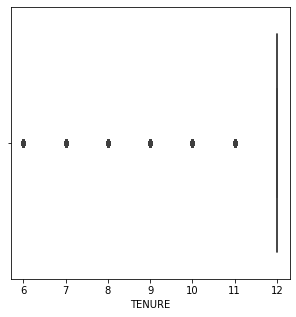

In [10]:
for i in df.columns:

    plt.figure(figsize=(5,5))
    sns.boxplot(data=df, x=i)

In [11]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [12]:
df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Tratamento de NaN

In [13]:
# Coluna MINIMUM_PAYMENTS
df[df['MINIMUM_PAYMENTS'].isna()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


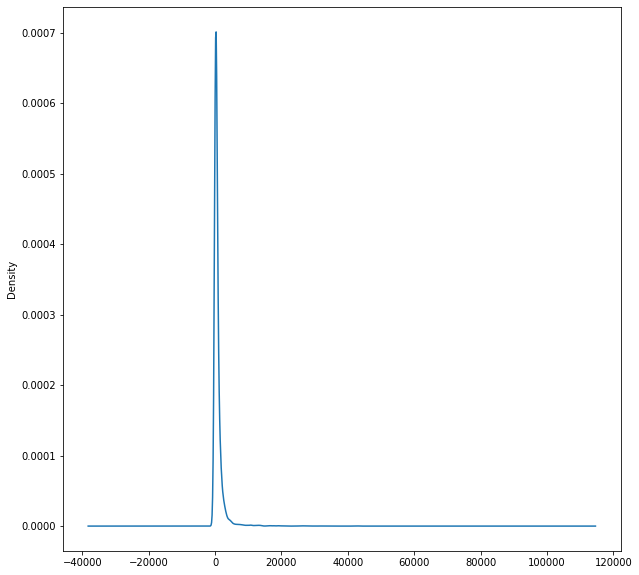

In [14]:
df['MINIMUM_PAYMENTS'].plot(kind='kde', figsize=(10,10));

In [15]:
df['MINIMUM_PAYMENTS'].mean(), df['MINIMUM_PAYMENTS'].median()

(864.2065423050828, 312.343947)

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Prenchimento de dados faltantes
#fillna = SimpleImputer(strategy='median')
#fillna.fit(df)

# Normalização
#scaler = MinMaxScaler()
#scaler.fit(df)

pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', MinMaxScaler())])

In [17]:
df_prepross = pipeline.fit_transform(df)
df_prepross[:10,:]

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, 0.00000000e+00,
        4.24000000e-03, 0.00000000e+00, 1.66667000e-01, 0.00000000e+00,
        8.33330000e-02, 0.00000000e+00, 0.00000000e+00, 5.58659218e-03,
        3.17195326e-02, 3.97863135e-03, 1.82564563e-03, 0.00000000e+00,
        1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.36684909e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.66666667e-01, 3.25203252e-02, 0.00000000e+00,
        2.32053422e-01, 8.08933873e-02, 1.40344791e-02, 2.22222000e-01,
        1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, 1.89682603e-02,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.35195531e-02,
        2.48747913e-01, 1.22643641e-02, 8.20961806e-03, 0.00000000e+00,
        1.00000000e+00],
       [8.75207906e-02, 6.36364000e-01, 3.05671522e-02, 3.677

# K-Means

In [18]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN

Text(0, 0.5, 'Cost')

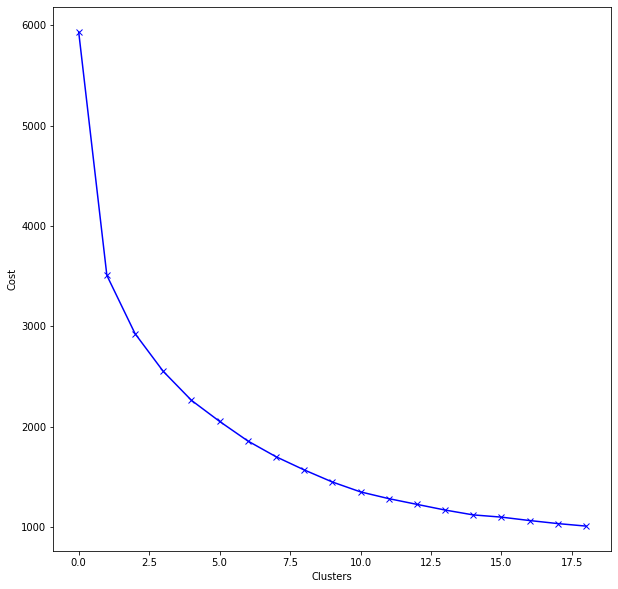

In [19]:

cost = []

for n in range(1, 20):

    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df_prepross)
    cost.append(kmeans.inertia_)

plt.figure(figsize=(10,10))
plt.plot(cost, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Cost')


In [36]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_prepross)
labels  = kmeans.labels_
clusters_centers = kmeans.cluster_centers_

In [38]:
from sklearn.metrics import silhouette_score

silhouette_score(df_prepross, labels)

0.33740271313673204

# Analisando as Cacarteristicas dos Centróides

In [39]:
df_centers = pd.DataFrame(data=pipeline.named_steps['scaler'].inverse_transform(clusters_centers), columns=df.columns)
df_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2231.689731,0.975500,248.610903,199.140051,49.569242,1557.502527,0.120607,0.069532,0.050765,0.218896,5.367540,2.353015,4280.256145,1542.837056,1070.455482,0.022066,11.880644
1,2374.225497,0.989938,4542.127328,3001.010027,1541.117301,713.172265,0.979806,0.810244,0.859370,0.094651,2.662618,64.125506,7713.360324,4416.347578,897.513867,0.267774,11.869096
2,152.054462,0.368983,343.347888,245.804603,97.830882,501.815729,0.188805,0.073162,0.110888,0.044158,1.012597,3.218992,4021.595607,1462.965215,203.805011,0.218430,11.782946
3,110.332196,0.896208,1058.392144,210.342891,849.043693,32.528752,0.857906,0.080750,0.793385,0.005447,0.092669,17.748271,3929.394568,1176.870023,188.002488,0.792171,11.287690
4,1501.455304,0.927308,1042.616176,280.594065,762.426281,684.440888,0.872303,0.101781,0.820008,0.093758,2.340704,20.922111,3948.050607,1459.124908,1197.964803,0.053692,11.659799
5,1343.945870,0.763449,286.922314,241.242355,46.237810,1832.450623,0.187043,0.109896,0.071322,0.275621,5.243802,2.638430,3156.818182,831.839087,450.248770,0.062294,7.332645
6,1598.931118,0.965582,1835.654428,1681.424047,154.580873,626.678619,0.786118,0.740192,0.135006,0.094307,2.210332,21.670357,5629.639942,2073.841516,687.087748,0.211911,11.790898


# Redução de Dimensionalidade

In [22]:
from sklearn.decomposition import PCA

pca = PCA(4)
pca.fit(df_prepross)


PCA(n_components=4)

In [40]:
df_pca4 = pca.transform(df_prepross)

In [43]:
df_pca4[:5]

array([[-0.48216769, -0.09765264, -0.04647341, -0.0582929 ],
       [-0.60857495, -0.01937583,  0.08210922, -0.21874787],
       [ 0.30450847,  0.92093391,  0.01220424,  0.1600326 ],
       [-0.58862232, -0.00563127,  0.03705502,  0.00442997],
       [-0.55435665,  0.052978  , -0.08418164, -0.13282653]])

In [46]:

wcss = []
silhouette = []
for n in range(2,30):
    kmeans_pca = KMeans(n)
    kmeans_pca.fit(df_pca4)
    labels = kmeans_pca.labels_
    wcss.append(kmeans_pca.inertia_)
    silhouette.append(silhouette_score(df_pca4,labels))




Text(0.5, 0, '')

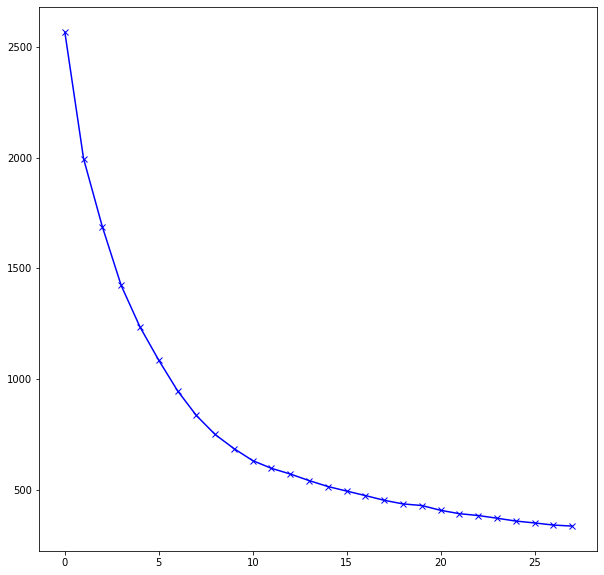

In [59]:
plt.figure(figsize=(10,10))
plt.plot(wcss,'bx-')
plt.xlabel('')

Text(0.5, 0, '')

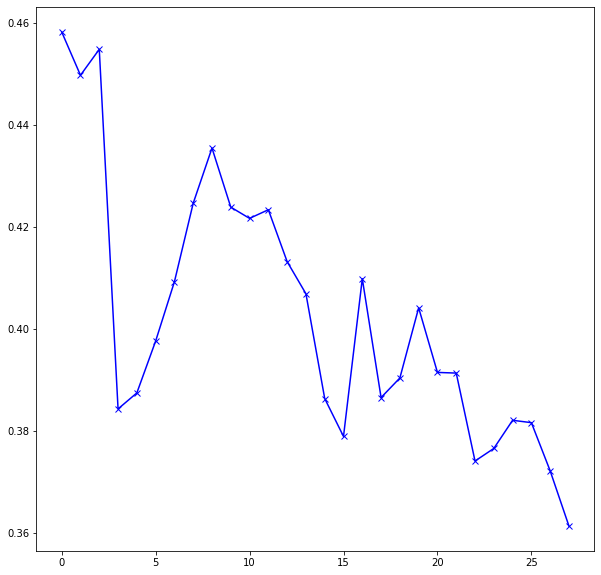

In [60]:
plt.figure(figsize=(10,10))
plt.plot(silhouette,'bx-')
plt.xlabel('')

In [82]:
kmeans = KMeans(n_clusters=4, max_iter=200, tol=1e-3)
kmeans.fit(df_pca4)
labels = kmeans.labels_

silhouette_score(df_pca4, labels)

0.4548246654874958

<AxesSubplot:>

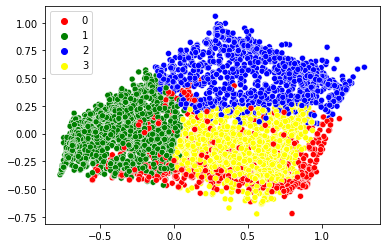

In [83]:
sns.scatterplot(x = df_pca4[:,0], y = df_pca4[:,1], hue = labels, data = df_pca4, palette = ['red', 'green', 'blue', 'yellow'])

NameError: name 'teste' is not defined